In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

class ObstacleMap:
    
    def __init__(self, StartConf: tuple, EndConf: tuple, MapBounds: tuple, ObstaclesNum: int, Shape: int):
        """
        Initialize an obstacle map with given parameters.

        Args:
            StartConf (tuple): Start configuration coordinates.
            EndConf (tuple): End configuration coordinates.
            MapBounds (tuple): Map boundary dimensions (x_max, y_max).
            ObstaclesNum (int): Number of obstacles to generate.
            Shape (int): Number of sides in polygon obstacles (minimum 3).

        Raises:
            Exception: If Shape is less than 3.
        """
        self.StartCoords = Point(StartConf[0], StartConf[1])
        self.EndCoords = Point(EndConf[0], EndConf[1])
        
        if Shape < 3:
            raise Exception("Min Num of sides in a Polygon is 3")
        else:
            self.ObstacleList, self.CentroidList = self.generate_polygon_obstacles(MapBounds, ObstaclesNum, Shape)
    
    def __get_angles(self, num_of_sides: int) -> list:
        """
        Generate a list of angles for the vertices of a polygon.

        Args:
            num_of_sides (int): Number of sides in the polygon.

        Returns:
            list: List of angles in radians.
        """
        random_numbers = [random.uniform(0, 1) for _ in range(num_of_sides)]
        normalized_numbers = [num / sum(random_numbers) for num in random_numbers]
        angles = np.cumsum([2*np.pi * x for x in normalized_numbers])
        angles_list = list(angles)
        return angles_list
    
    def __get_vertices(self, center: np.array, radius: float, angles_list: list):
        """
        Calculate vertices of a polygon based on center, radius, and angles.

        Args:
            center (np.array): Center coordinates of the polygon.
            radius (float): Radius of the polygon.
            angles_list (list): List of angles in radians.

        Returns:
            np.array: Array of vertices for the polygon.
        """
        vertices = np.array([center + np.array([radius*np.cos(angle), radius*np.sin(angle)]) for angle in angles_list])
        return vertices
    
    def generate_polygon_obstacles(self, MapBounds: tuple, ObstaclesNum: int, Shape: int):
        """
        Generate a list of polygon obstacles.

        Args:
            MapBounds (tuple): Map boundary dimensions (x_max, y_max).
            ObstaclesNum (int): Number of obstacles to generate.
            Shape (int): Number of sides in polygon obstacles.

        Returns:
            list: List of Shapely Polygon obstacles.
        """
        xmin, xmax = 0, MapBounds[0]
        ymin, ymax = 0, MapBounds[1]
        min_distance = 0.5
        ObstacleList = []
        CentroidList = []
        count = 0
        while count < ObstaclesNum:
            radius = random.uniform(0.07, 0.08) * xmax
            center = np.array([np.random.rand() * xmax, np.random.rand() * ymax])
            
            if Shape == 3:
                pshape = 3
            else:
                pshape = np.random.randint(low=3, high=Shape)
            
            angles_list = self.__get_angles(pshape)
            vertices = self.__get_vertices(center, radius, angles_list)
            polygon = Polygon(vertices)
            x, y = polygon.exterior.xy
            
            intersects = False
            for existing_obstacle in ObstacleList:
                if polygon.intersects(existing_obstacle) or polygon.distance(existing_obstacle) < min_distance or \
                polygon.intersects(self.StartCoords) or polygon.intersects(self.EndCoords) or \
                np.any(x < (self.StartCoords.x + 0.5)) or np.any(x > (self.EndCoords.x - 0.5)):
                    intersects = True
                    break
            
            if not intersects:
                ObstacleList.append(polygon)
                
                CentroidList.append(list(polygon.centroid.coords))
                count += 1
                
                
        
                
                
                
        
        return ObstacleList, CentroidList
    
    def generate_plot(self):
        """
        Generate a plot to visualize the obstacle map.
        """
        plt.axis('equal')
        for obstacle in self.ObstacleList:
            x, y = obstacle.exterior.xy
            plt.fill(x, y, c="blue")
            
        plt.plot(self.StartCoords.x, self.StartCoords.y, "X", color ="black")
        plt.plot(self.EndCoords.x, self.EndCoords.y, "X", color = "black")
        plt.show()


In [2]:
StartConf = (0.5, 5, 5.78)
EndConf = (9.5, 5, 2.79)
MapBounds=(10.0, 10.0)
ObstaclesNum=15
Shape=6

In [3]:
M = ObstacleMap(StartConf, EndConf, MapBounds, ObstaclesNum, Shape)

In [4]:
points = np.array(M.CentroidList)
points = points.reshape(-1,2)

In [5]:
points

array([[ 5.70392043,  9.45887681],
       [ 6.53674015,  1.15326361],
       [ 2.49171321,  5.73866341],
       [ 3.7292483 ,  7.7407258 ],
       [ 3.33239039,  2.74627381],
       [ 5.92031486,  3.01071405],
       [ 2.23720614,  9.74585335],
       [ 7.01006051,  7.33532516],
       [ 2.16111317,  0.63817359],
       [ 5.25157902,  5.94328961],
       [ 7.50866457,  8.68257903],
       [ 8.1133674 ,  3.11255238],
       [ 6.86325105,  4.81079026],
       [ 1.84652595,  2.48186243],
       [ 6.84546421, -0.02710829]])

In [6]:
x = points[:,0]
y = points[:,1]

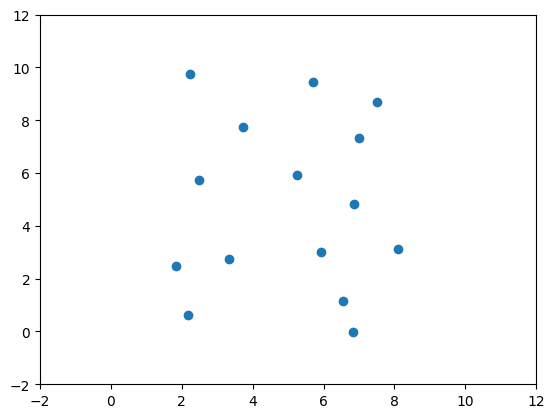

In [7]:
plt.xlim(-2,12)
plt.ylim(-2,12)
plt.scatter(x, y)

In [8]:
unique_coords = np.unique(points, axis=0)
hull = ConvexHull(unique_coords)
convex_hull_vertices = hull.points[hull.vertices]

plt.xlim(-2,12)
plt.ylim(-2,12)
plt.scatter(convex_hull_vertices[:,0], convex_hull_vertices[:,1])

NameError: name 'ConvexHull' is not defined

In [9]:
from scipy.spatial import ConvexHull
import numpy as np

def preprocess_coordinates(coordinates, epsilon=1e-6):
    unique_coords = np.unique(coordinates, axis=0)
    perturbed_coords = unique_coords + np.random.uniform(-epsilon, epsilon, size=unique_coords.shape)
    return perturbed_coords

def largest_convex_polygon_vertices(coordinates):
    hull = ConvexHull(coordinates)
    convex_hull_vertices = hull.points[hull.vertices]
    return convex_hull_vertices

# Example random coordinates (replace with your own)
coordinates = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])

preprocessed_coords = preprocess_coordinates(points)
largest_polygon_vertices = largest_convex_polygon_vertices(preprocessed_coords)
print("Vertices of the largest convex polygon:")
print(largest_polygon_vertices)


Vertices of the largest convex polygon:
[[ 2.2372067   9.7458535 ]
 [ 1.84652537  2.48186311]
 [ 2.1611124   0.63817282]
 [ 6.84546393 -0.02710877]
 [ 8.11336647  3.11255213]
 [ 7.50866491  8.68257818]
 [ 5.70391977  9.45887622]]


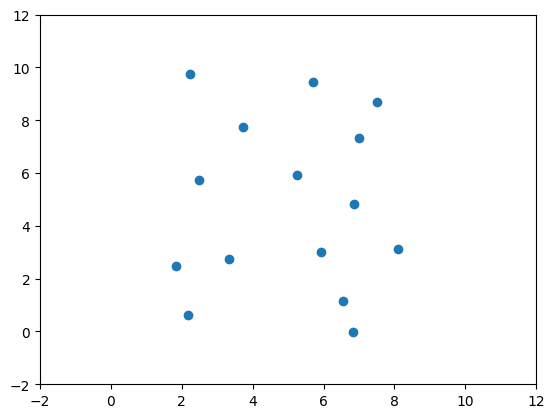

In [10]:
plt.xlim(-2,12)
plt.ylim(-2,12)
plt.scatter(x, y)

In [11]:
largest_convex_polygon_vertices

<function __main__.largest_convex_polygon_vertices(coordinates)>

In [12]:
points

array([[ 5.70392043,  9.45887681],
       [ 6.53674015,  1.15326361],
       [ 2.49171321,  5.73866341],
       [ 3.7292483 ,  7.7407258 ],
       [ 3.33239039,  2.74627381],
       [ 5.92031486,  3.01071405],
       [ 2.23720614,  9.74585335],
       [ 7.01006051,  7.33532516],
       [ 2.16111317,  0.63817359],
       [ 5.25157902,  5.94328961],
       [ 7.50866457,  8.68257903],
       [ 8.1133674 ,  3.11255238],
       [ 6.86325105,  4.81079026],
       [ 1.84652595,  2.48186243],
       [ 6.84546421, -0.02710829]])

In [13]:
largest_polygon_vertices

array([[ 2.2372067 ,  9.7458535 ],
       [ 1.84652537,  2.48186311],
       [ 2.1611124 ,  0.63817282],
       [ 6.84546393, -0.02710877],
       [ 8.11336647,  3.11255213],
       [ 7.50866491,  8.68257818],
       [ 5.70391977,  9.45887622]])

In [14]:
x = np.unique(points, axis=0)
x

array([[ 1.84652595,  2.48186243],
       [ 2.16111317,  0.63817359],
       [ 2.23720614,  9.74585335],
       [ 2.49171321,  5.73866341],
       [ 3.33239039,  2.74627381],
       [ 3.7292483 ,  7.7407258 ],
       [ 5.25157902,  5.94328961],
       [ 5.70392043,  9.45887681],
       [ 5.92031486,  3.01071405],
       [ 6.53674015,  1.15326361],
       [ 6.84546421, -0.02710829],
       [ 6.86325105,  4.81079026],
       [ 7.01006051,  7.33532516],
       [ 7.50866457,  8.68257903],
       [ 8.1133674 ,  3.11255238]])

In [15]:
points

array([[ 5.70392043,  9.45887681],
       [ 6.53674015,  1.15326361],
       [ 2.49171321,  5.73866341],
       [ 3.7292483 ,  7.7407258 ],
       [ 3.33239039,  2.74627381],
       [ 5.92031486,  3.01071405],
       [ 2.23720614,  9.74585335],
       [ 7.01006051,  7.33532516],
       [ 2.16111317,  0.63817359],
       [ 5.25157902,  5.94328961],
       [ 7.50866457,  8.68257903],
       [ 8.1133674 ,  3.11255238],
       [ 6.86325105,  4.81079026],
       [ 1.84652595,  2.48186243],
       [ 6.84546421, -0.02710829]])

In [16]:
y = np.random.uniform(-1e-6,1e-6, size = points.shape)
y

array([[-5.65658702e-07,  1.68040070e-07],
       [-1.11686016e-07,  4.19072944e-07],
       [ 3.83135927e-07, -9.60934663e-07],
       [-4.06480205e-08,  7.80232166e-07],
       [ 3.96565108e-07, -8.57076985e-08],
       [ 1.33623594e-08, -3.40084897e-08],
       [ 3.53454661e-07,  5.13572390e-07],
       [ 6.68030956e-07,  9.31637606e-07],
       [-3.43206777e-07, -8.48193227e-08],
       [ 8.91315223e-08, -3.47460988e-07],
       [-6.38247341e-07, -6.89574294e-08],
       [ 8.17087477e-07, -1.74888337e-10],
       [ 4.83345667e-07, -4.36393284e-07],
       [ 1.33285434e-07, -2.97511912e-07],
       [-3.09524234e-07, -6.11217034e-07]])

In [17]:
x + y

array([[ 1.84652538,  2.48186259],
       [ 2.16111306,  0.63817401],
       [ 2.23720653,  9.74585239],
       [ 2.49171317,  5.73866419],
       [ 3.33239078,  2.74627372],
       [ 3.72924832,  7.74072576],
       [ 5.25157937,  5.94329012],
       [ 5.7039211 ,  9.45887774],
       [ 5.92031452,  3.01071396],
       [ 6.53674024,  1.15326327],
       [ 6.84546358, -0.02710836],
       [ 6.86325187,  4.81079026],
       [ 7.01006099,  7.33532472],
       [ 7.5086647 ,  8.68257873],
       [ 8.11336709,  3.11255177]])